This is an example of a toy dynamical system from the course notes for UW's MSE 564 course.

In this case, we model the weather given the following rules, which are then encoded in the Markov transition probability matrix (TPM):

1) If today is a rainy day, then:
   - There is a 50% chance that tomorrow will be rainy
   - There is a 25% chance that tomorrow will be nice
   - There is a 25% chance that tomorrow will be cloudy

2) If today is a nice day, then:
   - There is a 50% chance that tomorrow will be rainy
   - There is a 0% chance that tomorrow wil be nice
   - There is a 50% chance that tomorrow will be cloudy
3) If today is a cloudy day, then:
   - There is a 25% chance that tomorrow will be rainy
   - There is a 25% chance that tomorrow will be nice
   - There is a 50% chance that tomorrow will be cloudy
  
Therefore, our TPM will be a 3x3 matrix, which we will multiply by the 3x1 vector x_today to yield the vector x_tomorrow

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Define the Markov transition probability matrix and set the current state to a nice day

A = np.array([[0.5, 0.5, 0.25], [0.25, 0, 0.25], [0.25, 0.5, 0.5]])
x_today = np.array([0, 1, 0]) # It's nice outside!

print(f'The TPM is of shape: {A.shape}')
print(f'x_today is of shape: {x_today.shape}')

The TPM is of shape: (3, 3)
x_today is of shape: (3,)


In [3]:
# Quick test

print(A @ x_today)

[0.5 0.  0.5]


In [4]:
# Define the function used to generate a prediction of the evolution of the weather

def weather_predictor(A, x_today, n_steps):
    weather_trace = np.zeros((n_steps, x_today.size))
    for i in range(n_steps):
        x_tomorrow = A @ x_today
        x_today = x_tomorrow
        weather_trace[i, :] = x_tomorrow
    return weather_trace

In [5]:
# Call the function with 100 timesteps
trace = weather_predictor(A, x_today, 100)
trace.shape

(100, 3)

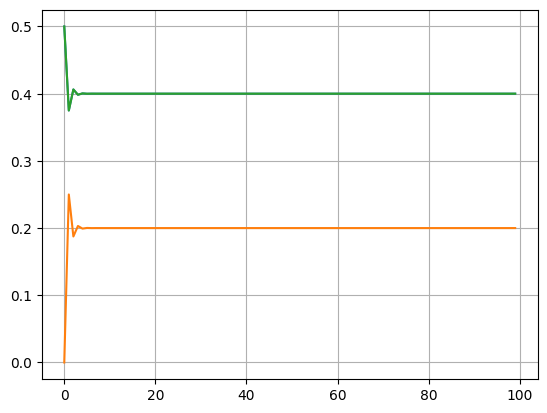

In [6]:
# Plot the weather trace
plt.plot(trace)
plt.grid(True)